<a href="https://colab.research.google.com/github/YkRic/CursoCienciaDeDados/blob/main/MVP_Sprint_II_JessicaPecho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - SPRINT II - MACHINE LEARNING & ANALYTICS**

* Nome: Jessica Margarita Palomares Pecho
* Data: maio e julho de 2023

##PARTE 1 - MACHINE LEARNING

**TÍTULO: CLASSIFICAÇÃO DE CRIANÇAS COM TRANSTORNO AUTISTA (TEA)**

**OBJETIVO:** O propósito deste classificador é prever se uma criança é considerada autista. Isto baseado num questionario [Q-Chart-10](https://www.autismalert.org/uploads/PDF/SCREENING--AUTISM--QCHAT-10%20Question%20Autism%20Survey%20for%20Toddlers.pdf), que contém 10 itens, destinado a ser preenchido pelos pais ou cuidadores da criança a ser avaliada e cujo objetivo é identificar possíveis sinais precoces de autismo em crianças.

**INFORMAÇÕES SOBRE OS DADOS:** Os dados em questão são provenientes do aplicativo the [ASDTests screening app](https://play.google.com/store/apps/details?id=com.asd.asdquiz&hl=en&pli=1) e pertencem a pesquisa realizada por Fayez Thabtah professor do Manukau Institute of Technology. O conjunto de dados é uma triagem de autismo realizada em crianças que continham características pertinentes para a determinação de traços autistas.

**CRÉDITOS:** O dataset foi baixado do repositório Kaggle sob o título "Autism screening data for toddlers"  cujo criador foi Fadi Fayez Thabtah.

Para maiores informações clique no link:
https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers?resource=download

**DESCRIÇÃO DOS DADOS:**  

* Número de exemplos: 1054
* Número de atributos: 18 + o atributo de saída
* Detalhes dos atributos:

  * Perguntas do questionario:  
    1 - A1 [Seu filho olha para você quando você chama o nome dele?] (numérico)  
    2 - A2 [É fácil para você manter o contato visual com seu filho?] (numérico)    
    3 - A3 [Seu filho aponta para indicar algo?] (numérico)    
    4 - A4 [Seu filho aponta para compartilhar interesse com vc?] (numérico)  
    5 - A5 [Seu filho finge?] (numérico)  
    6 - A6 [Seu filho segue para onde você está olhando?] (numérico)  
    7 - A7 [Se você ou outra pessoa da família está visivelmente chateada, seu filho mostra sinanis de querer confortá-los?] (numérico)  
    8 - A8 [Você descreveria as primeiras palavras de seu filho como?] (numérico)  
    9 - A9 [Seu filho usa gestos simples?] (numérico)  
    10 -A10 [Seu filho não encara nada sem propósito aparente?] (numérico)  

  * Relacionados com os dados da criança:  
    11 - Age_monts [Idade]  
    12 - Sexo [Sexo]  
    13 - Ethnicity [Lista de etnias]  
    14 - Jaundice [Nasceu com icterícia]    

**ESTRUTURA:** O notebook está divido da seguinte forma:  

  1. Importação das bibliotecas
  2. Carga do dataset
  3. Funções úteis
  4. Separar os atributos numéricos e categóricos
  5. Visualização dos dados numéricos
  6. Feature selection
  7. Separação em conjunto de treino e teste com holdout
  8. Pré-processamento dos dados
  9. Comparação e avaliação dos modelos
  10. Escolha do modelo e otimização dos hiperparâmetros
  11. Finalização do modelo


###1.Importações necessárias  para executar o notebook

In [ ]:
# Imports necessários
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

###**2. Carga do dataset**
Inicialmente é realizado a carga do dataset. O arquivo csv se encontra no meu repositório GitHub.


In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/YkRic/CursoCienciaDeDados/dataset_autismo/Toddler%20Autism%20dataset%20July%202018.csv"

# Cabeçalho das colunas
colunas = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','Age_Mons','Qchat-10-Score','Sex',
           'Ethnicity','Jaundice','Family_mem_with_ASD','Who completed the test','Class/ASD Traits']

# Lê o arquivo utilizando as colunas informadas, exluindo a coluna "record"
#dataset = pd.read_csv(url, names=colunas, delimiter=',')

dataset = pd.read_csv(url, skiprows=1, names=colunas, delimiter=',')


###**3. Análise Exploratória Preliminar**
Examinando as dimensões do dataset

#### **3.1 Dimensões**

In [ ]:
# Verificando dimensões do dataset (quantos atributos e instâncias existem)
dataset.shape

(1054, 18)

#### **3.2 Informações**

In [ ]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 1 to 1054
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      1054 non-null   int64 
 1   A2                      1054 non-null   int64 
 2   A3                      1054 non-null   int64 
 3   A4                      1054 non-null   int64 
 4   A5                      1054 non-null   int64 
 5   A6                      1054 non-null   int64 
 6   A7                      1054 non-null   int64 
 7   A8                      1054 non-null   int64 
 8   A9                      1054 non-null   int64 
 9   A10                     1054 non-null   int64 
 10  Age_Mons                1054 non-null   int64 
 11  Qchat-10-Score          1054 non-null   int64 
 12  Sex                     1054 non-null   object
 13  Ethnicity               1054 non-null   object
 14  Jaundice                1054 non-null   object
 15  Fami

Podemos observar que **só** de dados da criança  estão classificados como sendo do tipo "object".

In [ ]:
# Verifica o tipo de dataset de cada atributo.
dataset.dtypes

A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

É possivel observar que não existe dados de tipo null, e que não  é necessário o tratamento de *Missingns*

#### **3.3 Mostrar 10 primeiros e últimos ítens**
Examinando as dimensões do dataset
Listamos a seguir alguns dos registros (de forma transposta, para facilitar a visualização):

In [ ]:
dataset.head(10).transpose()

1               2               3   \
A1                                   0               1               1   
A2                                   0               1               0   
A3                                   0               0               0   
A4                                   0               0               0   
A5                                   0               0               0   
A6                                   0               1               0   
A7                                   1               1               1   
A8                                   1               0               1   
A9                                   0               0               0   
A10                                  1               0               1   
Age_Mons                            28              36              36   
Qchat-10-Score                       3               4               4   
Sex                                  f               m               m   
Ethnicity               middle eastern  White European  middle eastern   
Jaundice                           yes             yes             yes   
Family_mem_with_ASD                 no              no              no   
Who completed the test   family member   family member   family member   
Class/ASD Traits                    No             Yes             Yes   

                                   4               5              6   \
A1                                  1               1              1   
A2                                  1               1              1   
A3                                  1               0              0   
A4                                  1               1              0   
A5                                  1               1              1   
A6                                  1               1              1   
A7                                  1               1              1   
A8                                  1               1              1   
A9                                  1               1              1   
A10                                 1               1              1   
Age_Mons                           24              20             21   
Qchat-10-Score                     10               9              8   
Sex                                 m               f              m   
Ethnicity                    Hispanic  White European          black   
Jaundice                           no              no             no   
Family_mem_with_ASD                no             yes             no   
Who completed the test  family member   family member  family member   
Class/ASD Traits                  Yes             Yes            Yes   

                                   7              8              9   \
A1                                  1              0              0   
A2                                  0              1              0   
A3                                  0              0              0   
A4                                  1              0              0   
A5                                  1              1              0   
A6                                  1              0              0   
A7                                  0              1              1   
A8                                  0              1              0   
A9                                  1              1              0   
A10                                 0              1              1   
Age_Mons                           33             33             36   
Qchat-10-Score                      5              6              2   
Sex                                 m              m              m   
Ethnicity                       asian          asian          asian   
Jaundice                          yes            yes             no   
Family_mem_with_ASD                no             no             no   
Who completed the test  family member  family member 

In [ ]:
# Verificando as últimas linhas

dataset.tail(10).transpose()

1045                      1046  \
A1                                  1                         1   
A2                                  1                         1   
A3                                  1                         1   
A4                                  1                         1   
A5                                  1                         1   
A6                                  1                         1   
A7                                  1                         1   
A8                                  1                         1   
A9                                  1                         1   
A10                                 1                         1   
Age_Mons                           25                        30   
Qchat-10-Score                     10                        10   
Sex                                 m                         m   
Ethnicity                       asian            middle eastern   
Jaundice                           no                        no   
Family_mem_with_ASD               yes                        no   
Who completed the test  family member  Health Care Professional   
Class/ASD Traits                  Yes                       Yes   

                                  1047            1048            1049  \
A1                                   0               1               0   
A2                                   1               1               0   
A3                                   0               0               0   
A4                                   1               0               0   
A5                                   1               1               0   
A6                                   1               1               0   
A7                                   1               1               0   
A8                                   1               0               0   
A9                                   1               0               0   
A10                                  0               0               0   
Age_Mons                            24              30              30   
Qchat-10-Score                       7               5               0   
Sex                                  f               f               f   
Ethnicity               middle eastern  White European  White European   
Jaundice                            no              no              no   
Family_mem_with_ASD                 no              no              no   
Who completed the test   family member   family member   family member   
Class/ASD Traits                   Yes             Yes              No   

                                  1050           1051            1052  \
A1                                   0              0               1   
A2                                   0              0               0   
A3                                   0              1               1   
A4                                   0              1               1   
A5                                   0              1               1   
A6                                   0              0               1   
A7                                   0              1               1   
A8                                   0              0               1   
A9                                   0              1               1   
A10                                  1              0               1   
Age_Mons                            24             12              18   
Qchat-10-Score                       1              5               9   
Sex                                  f              m               m   
Ethnicity               White European          black  middle eastern   
Jaundice                            no            yes             yes   
Family_mem_with_ASD                yes             no              no   
Who completed the test   family member  family member   family member   
Class/ASD Traits                    No

#### **3.4 Estatística básica do dataset**


In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe().transpose()

count       mean       std   min   25%   50%   75%   max
A1              1054.0   0.563567  0.496178   0.0   0.0   1.0   1.0   1.0
A2              1054.0   0.448767  0.497604   0.0   0.0   0.0   1.0   1.0
A3              1054.0   0.401328  0.490400   0.0   0.0   0.0   1.0   1.0
A4              1054.0   0.512334  0.500085   0.0   0.0   1.0   1.0   1.0
A5              1054.0   0.524668  0.499628   0.0   0.0   1.0   1.0   1.0
A6              1054.0   0.576850  0.494293   0.0   0.0   1.0   1.0   1.0
A7              1054.0   0.649905  0.477226   0.0   0.0   1.0   1.0   1.0
A8              1054.0   0.459203  0.498569   0.0   0.0   0.0   1.0   1.0
A9              1054.0   0.489564  0.500128   0.0   0.0   0.0   1.0   1.0
A10             1054.0   0.586338  0.492723   0.0   0.0   1.0   1.0   1.0
Age_Mons        1054.0  27.867173  7.980354  12.0  23.0  30.0  36.0  36.0
Qchat-10-Score  1054.0   5.212524  2.907304   0.0   3.0   5.0   8.0  10.0

Os atributos *sex, Ethnicity, Jaundice, Family_mem_with_AS, Who completed the test e Class/ASD Traits* não são apresentados no resumo estatístico. Vamos transformar esses valores *sex, Jaundice, Family_mem_with_AS e Class/ASD Traits* para dados numéricos antes de analizá-los. Já os atributos Ethnicity e Who completed the test, não apresentam relevância. Na seção de pre-processamento iremos deletar.

In [ ]:
# converte o atributo Sex para 0 e 1 , sendo m = 1 e f = 0
dataset['Sex'] = dataset['Sex'].replace('m', 1)  # masculino
dataset['Sex'] = dataset['Sex'].replace('f', 0) #feminino

In [ ]:
# converte o atributo Jaundice(Nasceu com icterícia) para 0 e 1 , sendo Yes = 1 e No = 0
dataset['Jaundice'] = dataset['Jaundice'].replace('yes', 1)  # yes
dataset['Jaundice'] = dataset['Jaundice'].replace('no', 0) #no

In [ ]:
# converte o atributo Family_mem_with_ASD(Familiar com TEA) para 0 e 1 , sendo Yes = 1 e No = 0
dataset['Family_mem_with_ASD'] = dataset['Family_mem_with_ASD'].replace('yes', 1)  # yes
dataset['Family_mem_with_ASD'] = dataset['Family_mem_with_ASD'].replace('no', 0) #no

In [ ]:
# converte o atributo Class/ASD Traits para 0 e 1 , sendo Yes = 1 e No = 0
dataset['Class/ASD Traits'] = dataset['Class/ASD Traits'].replace('Yes', 1)
dataset['Class/ASD Traits'] = dataset['Class/ASD Traits'].replace('No', 0)

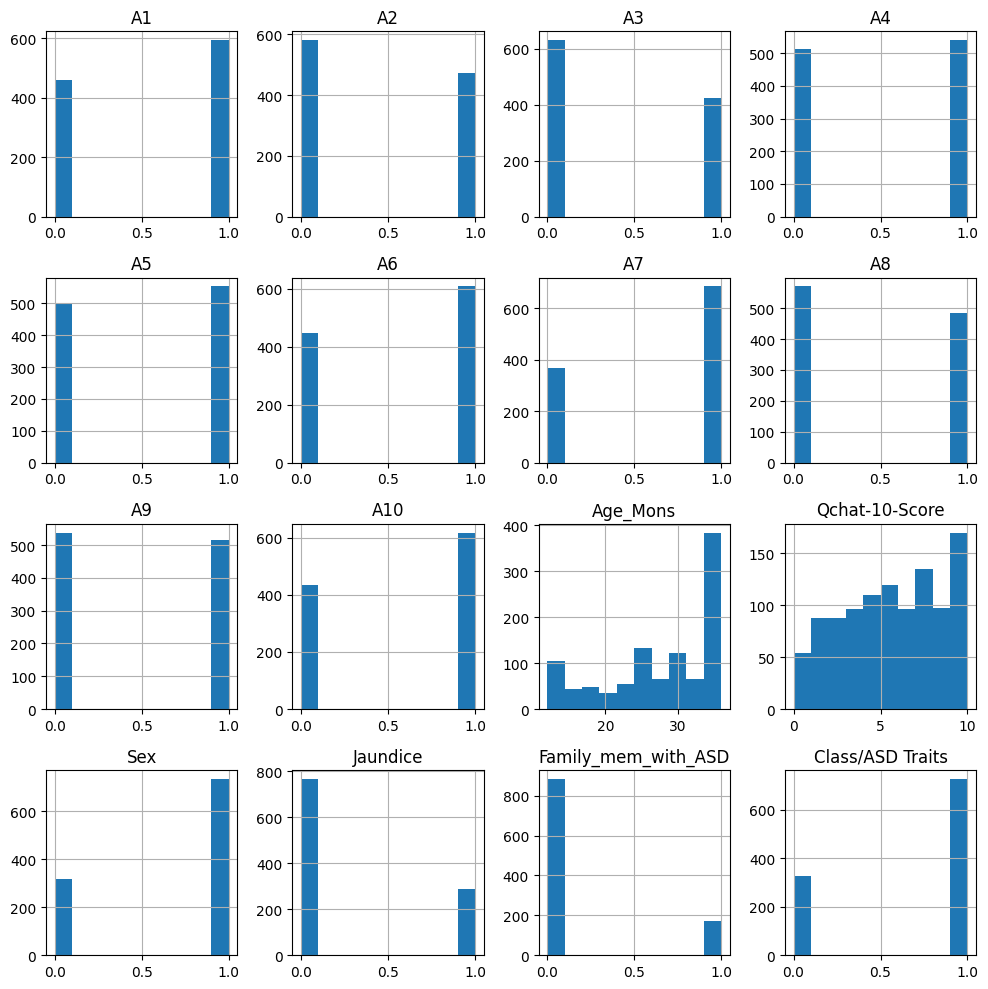

In [ ]:
# Histograma
dataset.hist(figsize = (10,10))
plt.tight_layout()
plt.show()

###**4. Pré-Processamento de dados**


In [ ]:
# contabilizamos a quantidade de dados null por cada coluna
dataset.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

Não foi identificado nehuma resposta com informaçoes faltantes, não sendo necessário realizar o tratamento desses casos.

####**4.1 Remoção de atributos irrelevantes**


Optei pela remoção da coluna Qchart_10_Score, pois ele é usada para atribuir uma pontuação que podería interferir no resultado da clasificação. Portanto, se mantivesse esse atributo existiria a possibilidade do modelo ficar sobre-ajustado


In [ ]:
datasetProcessado = dataset.copy()
datasetProcessado = dataset.drop(['Qchat-10-Score'], axis=1)

####**4.2 Verificação de valores duplicados**


In [ ]:
datasetProcessado.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
Length: 1054, dtype: bool

In [ ]:
# remove todas as linhas duplicadas de nossos dados onde os valores são os mesmos em todas as colunas.
datasetProcessado = datasetProcessado.drop_duplicates()
datasetProcessado

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex       Ethnicity  \
1      0   0   0   0   0   0   1   1   0    1        28    0  middle eastern   
2      1   1   0   0   0   1   1   0   0    0        36    1  White European   
3      1   0   0   0   0   0   1   1   0    1        36    1  middle eastern   
4      1   1   1   1   1   1   1   1   1    1        24    1        Hispanic   
5      1   1   0   1   1   1   1   1   1    1        20    0  White European   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ...             ...   
1050   0   0   0   0   0   0   0   0   0    1        24    0  White European   
1051   0   0   1   1   1   0   1   0   1    0        12    1           black   
1052   1   0   1   1   1   1   1   1   1    1        18    1  middle eastern   
1053   1   0   0   0   0   0   0   1   0    1        19    1  White European   
1054   1   1   0   0   1   1   0   1   1    0        24    1           asian   

      Jaundice  Family_mem_with_ASD Who completed the test  Class/ASD Traits  
1            1                    0          family member                 0  
2            1                    0          family member                 1  
3            1                    0          family member                 1  
4            0                    0          family member                 1  
5            0                    1          family member                 1  
...        ...                  ...                    ...               ...  
1050         0                    1          family member                 0  
1051         1                    0          family member                 1  
1052         1                    0          family member                 1  
1053         0                    1          family member                 0  
1054         1                    1          family member                 1  

[975 rows x 17 columns]

Foram deletados 79 linhas duplicados no dataset

####**4.3 Limpeza de dados**


Identificou-se que o atributo *Age-Mons*, relacionado a idade das crianças é de tipo contínuo, especificado em meses. Categorizei as idades das crianças em 4 grupos:
*   Crianças com menos de um ano : de 0 a 11 meses  
*   Crianças com um ano: de 12 a 23 meses
*   Crianças com dois anos: de 24 a 35 meses
*   Crianças com três anos: de 36 a 47

Devido à alguns modelos apresentarem dificuldades para realizar o processamento de valores de texto (directamente), fez-se uma transformação das categorias em valores numéricos.



In [ ]:
datasetProcessado.Age_Mons = np.where((datasetProcessado.Age_Mons <= 11) , 0, datasetProcessado.Age_Mons)
datasetProcessado.Age_Mons = np.where((datasetProcessado.Age_Mons > 11) & (datasetProcessado.Age_Mons <= 23) , 1, datasetProcessado.Age_Mons)
datasetProcessado.Age_Mons = np.where((datasetProcessado.Age_Mons > 23) & (datasetProcessado.Age_Mons <= 35) , 2, datasetProcessado.Age_Mons)
datasetProcessado.Age_Mons = np.where((datasetProcessado.Age_Mons > 35) & (datasetProcessado.Age_Mons <= 47) , 4, datasetProcessado.Age_Mons)

Nos histogramas apresentados na seção 3.4, pode-se apreciar que existe um desbalanceamento no atributo clasificatório (ClassASD_Traits). Portanto, podemos afirmar que o dataset tem muitas informações  a respeito da categoria mais incidente (criança clasificcada com traços de autismo), o que pode, interferir no resultado dos modelos.  

Para resolver o desbalancemento de dados desbalanceados podemos usar o Método *NearMiss, Undersampling, Smote e Oversampling*

**Undersampling**.  consiste em reduzir o número de observações da classe majoritária para diminuir a diferença entre as categorias
Elemento de lista

**Oversampling.** consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categorias.

**Smote** consiste em criar observações intermediárias entre dados parecidos.

Optei por usar o método de Undersampling




In [ ]:
# Undersampling da data
noAsdTraits = datasetProcessado[datasetProcessado['Class/ASD Traits']==0.0]
yesAsdTraits = datasetProcessado[datasetProcessado['Class/ASD Traits']==1.0]
yesAsdTraits = yesAsdTraits.sample(n=len(noAsdTraits), random_state=101)
df = pd.concat([yesAsdTraits,noAsdTraits],axis=0)

Após a undersampling, é possivel ver que a data está balanceada no atributo Class/ASD Traits

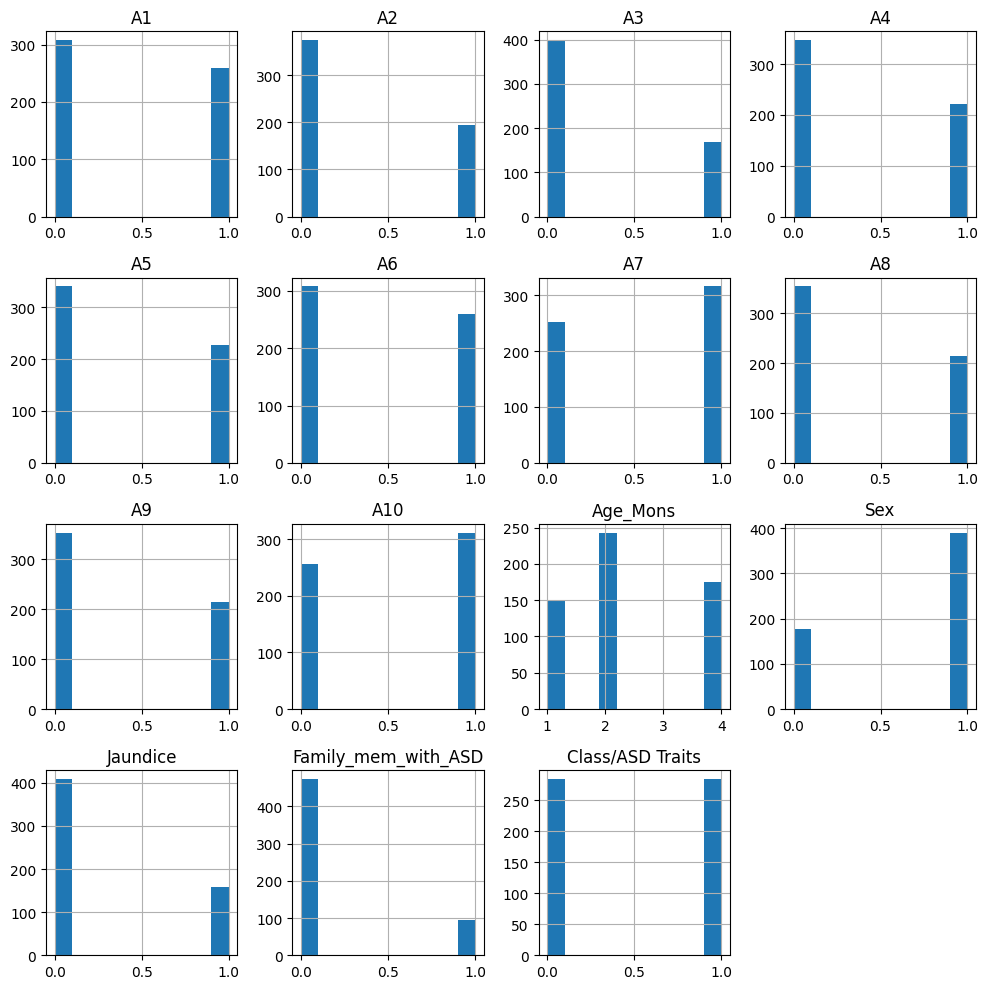

In [ ]:
# Histograma
df.hist(figsize = (10,10))
plt.tight_layout()
plt.show()

####**4.4 Relação entre atributos**


In [ ]:
# matriz de correlação
df.corr()

A1        A2        A3        A4        A5  \
A1                   1.000000  0.433662  0.283219  0.317743  0.328977   
A2                   0.433662  1.000000  0.253994  0.293299  0.296332   
A3                   0.283219  0.253994  1.000000  0.554845  0.362657   
A4                   0.317743  0.293299  0.554845  1.000000  0.348368   
A5                   0.328977  0.296332  0.362657  0.348368  1.000000   
A6                   0.375824  0.321888  0.314137  0.324991  0.429904   
A7                   0.308356  0.277010  0.193619  0.312903  0.348128   
A8                   0.248254  0.244461  0.193333  0.199239  0.319445   
A9                   0.397694  0.279894  0.421049  0.419518  0.479093   
A10                  0.051015  0.100255 -0.021911 -0.010120  0.056019   
Age_Mons             0.004376  0.043383 -0.083845 -0.021012 -0.003929   
Sex                  0.117919  0.086402  0.057792  0.110988  0.119632   
Jaundice            -0.006153  0.055350 -0.019798 -0.006953  0.073407   
Family_mem_with_ASD  0.047277 -0.011045  0.062504 -0.054162 -0.045737   
Class/ASD Traits     0.530065  0.482622  0.442862  0.509165  0.581846   

                           A6        A7        A8        A9       A10  \
A1                   0.375824  0.308356  0.248254  0.397694  0.051015   
A2                   0.321888  0.277010  0.244461  0.279894  0.100255   
A3                   0.314137  0.193619  0.193333  0.421049 -0.021911   
A4                   0.324991  0.312903  0.199239  0.419518 -0.010120   
A5                   0.429904  0.348128  0.319445  0.479093  0.056019   
A6                   1.000000  0.365259  0.284717  0.470552  0.065220   
A7                   0.365259  1.000000  0.277482  0.404677  0.166817   
A8                   0.284717  0.277482  1.000000  0.284627  0.090915   
A9                   0.470552  0.404677  0.284627  1.000000  0.072234   
A10                  0.065220  0.166817  0.090915  0.072234  1.000000   
Age_Mons             0.046605  0.032464  0.126059 -0.008379 -0.081122   
Sex                  0.034120  0.023134  0.070988  0.073376 -0.032231   
Jaundice             0.048944  0.051638  0.033139 -0.009580  0.044623   
Family_mem_with_ASD  0.047277 -0.050499 -0.092051 -0.015442 -0.025077   
Class/ASD Traits     0.593673  0.574078  0.457785  0.642490  0.198148   

                     Age_Mons       Sex  Jaundice  Family_mem_with_ASD  \
A1                   0.004376  0.117919 -0.006153         4.727696e-02   
A2                   0.043383  0.086402  0.055350        -1.104511e-02   
A3                  -0.083845  0.057792 -0.019798         6.250352e-02   
A4                  -0.021012  0.110988 -0.006953        -5.416228e-02   
A5                  -0.003929  0.119632  0.073407        -4.573717e-02   
A6                   0.046605  0.034120  0.048944         4.727696e-02   
A7                   0.032464  0.023134  0.051638        -5.049878e-02   
A8                   0.126059  0.070988  0.033139        -9.205127e-02   
A9                  -0.008379  0.073376 -0.009580        -1.544247e-02   
A10                 -0.081122 -0.032231  0.044623        -2.507733e-02   
Age_Mons             1.000000  0.089662 -0.026731         1.173276e-02   
Sex                  0.089662  1.000000  0.006995         1.488795e-02   
Jaundice            -0.026731  0.006995  1.000000         7.055725e-02   
Family_mem_with_ASD  0.011733  0.014888  0.070557         1.000000e+00   
Class/ASD Traits     0.042078  0.113862  0.098035         3.734354e-17   

                     Class/ASD Traits  
A1                       5.300651e-01  
A2                       4.826215e-01  
A3                       4.428616e-01  
A4                       5.091646e-01  
A5                       5.818461e-01  
A6                       5.936729e-01  
A7                       5.740784e-01  
A8                       4.577855e-01  
A9                       6.424905e-01  
A10                      1.981485e-01  
Age_Mons                 4.207792e-02  
Sex                     

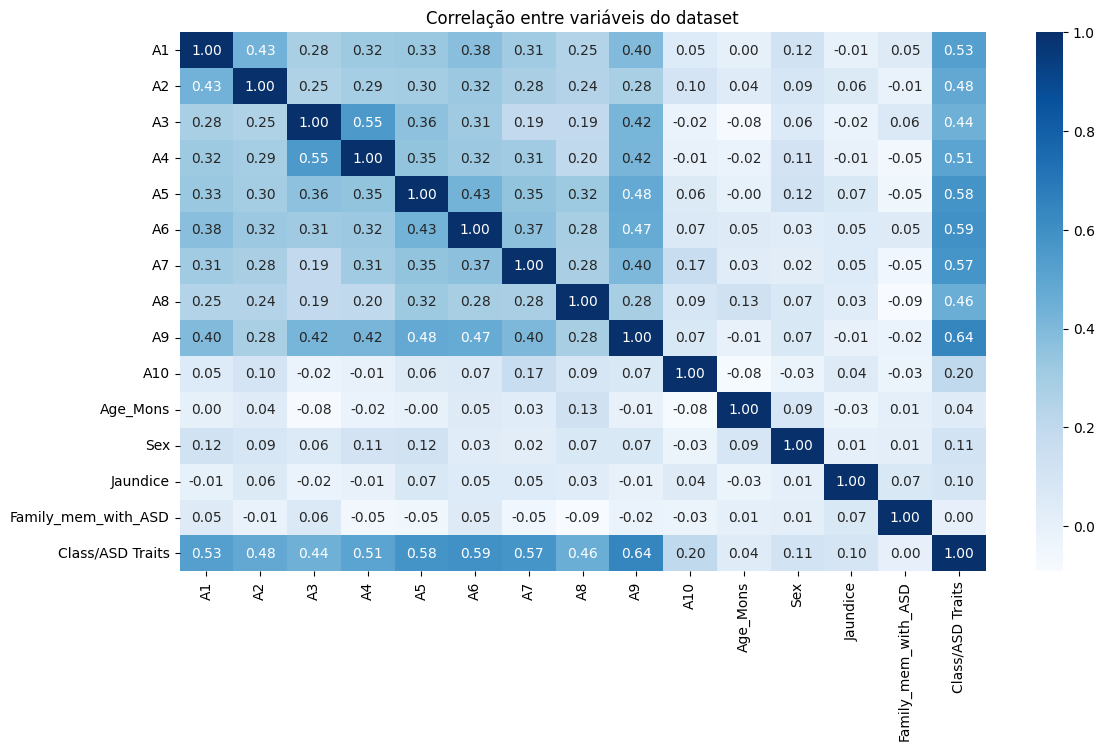

In [ ]:
#headmap
fig, ax = plt.subplots(figsize=(13,7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

####**4.5 Feature Importance**


Para obter os atributos com maior relevância e consequentemente, minimizar os custos de medição, bucou-se realizar a redução da dimensionalidade dos dados. Para tal, utilizou-se o modelo Random Forest para identificar a importância de cada atributo com base ao ganho da entropia, por meio da função* feature_importances_*.

Text(0.5, 1.0, 'Importância de cada feature')

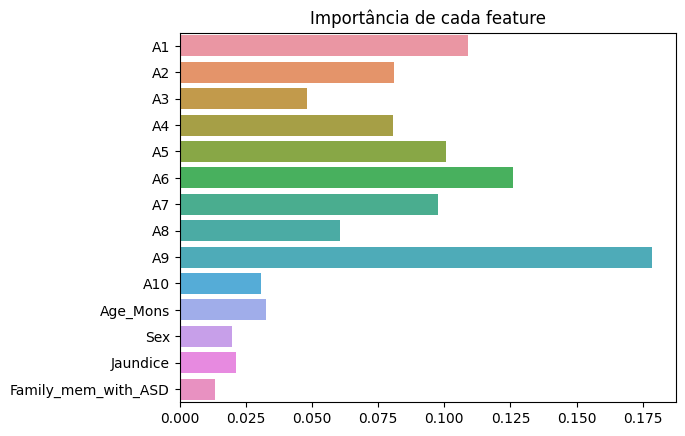

In [ ]:
X = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons','Sex', 'Jaundice', 'Family_mem_with_ASD']].copy()
y = df[['Class/ASD Traits']].copy()
col_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','Age_Mons','Sex',
           'Jaundice','Family_mem_with_ASD']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=col_names)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

A partir desse resultado, selecionei apenas os seguintes atributos: *A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, Age_Mons, Sex e Jaundice*

In [ ]:
datasettoTrain = df.copy()
datasettoTrain = datasettoTrain.drop(['Ethnicity', 'Family_mem_with_ASD', 'Who completed the test'], axis=1)


In [ ]:
datasettoTrain

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Jaundice  \
797    1   1   1   1   1   1   1   1   1    1         4    0         1   
448    1   1   1   1   1   1   1   1   1    1         1    1         0   
341    1   1   1   1   1   1   1   1   1    1         2    1         1   
967    1   0   1   1   1   1   0   1   1    0         1    1         0   
198    1   1   0   0   0   1   1   1   1    1         1    1         0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ...       ...   
1041   0   0   0   0   0   0   0   0   0    1         2    1         0   
1042   0   0   0   1   0   0   1   0   0    0         2    1         1   
1049   0   0   0   0   0   0   0   0   0    0         2    0         0   
1050   0   0   0   0   0   0   0   0   0    1         2    0         0   
1053   1   0   0   0   0   0   0   1   0    1         1    1         0   

      Class/ASD Traits  
797                  1  
448                  1  
341                  1  
967                  1  
198                  1  
...                ...  
1041                 0  
1042                 0  
1049                 0  
1050                 0  
1053                 0  

[568 rows x 14 columns]

###**5. Treinamento**


 Fiz a preparação dos dados, aplicaremos o holdout para efetuar a divisão em bases de treino (80%) e teste (20%) e separaremos em dez folds usando a validação cruzada:

In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = datasettoTrain.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds


 Crie os modelos com os algoritmos KNN, Árvore de Classificação, Naive Bayes e SVM, adicionando-os em uma lista. Depois, cada um desses modelos é treinado e avaliado com a base de treino, usando a validação cruzada 10-fold.

KNN: 0.909614 (0.044297)
CART: 0.889855 (0.038120)
NB: 0.935942 (0.046151)
SVM: 0.964831 (0.019885)
TREE: 0.900918 (0.031450)


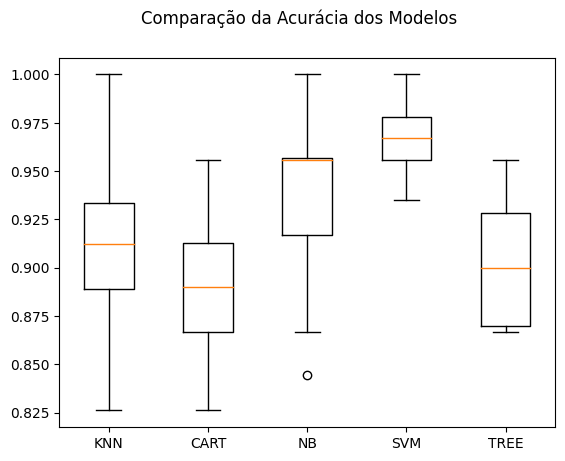

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

No gráafico *boxplot*  pode-se apreciar que  o modelo treinado com SVM apresentou os melhores resultados (96% de acurácia média e desvio-padrão de 2%). Assim, construirei um novo modelo, treinado com toda a base de treino. Adicionalmente, esse modelo será avaliado utilizando a base de teste.

In [ ]:

# Criando um modelo com todo o conjunto de treino
model = SVC()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9824561403508771


O resultado da acuracia do modelo é de 98%.

##PARTE 2 - MACHINE LEARNING & ANALYTICS




TÍTULO: CLASSIFICAÇÃO DE MOSQUITOS  

OBJETIVO:  

Nesse trabalho é usado  o dataset de 6 especies de Mosquitos tiradas pela câmera de um smartphone. As imagens estão categorizadas em 6 pastas distintas: "Aedes-Aegypti", "Aedes-Albopictus", "Aedes-Vexans", "Anopheles-Tessellatus", "Culex-Quinquefasciatus"e  "Culex-vishnui"


O objetivo do problema é desenvolver um modelo de classificação capaz de atribuir corretamente as categorias às imagens de teste com a maior precisão possível.


INFORMAÇÕES SOBRE OS DADOS:

CRÉDITOS: O dataset foi baixado do repositório Kaggle sob o título "6 Species Mosquito in Thailand for Classification" cujo criador foi Natthakorn Kasamsumran.

Para maiores informações clique no link: https://www.kaggle.com/datasets/cyberthorn/chula-mosquito-classification

###**1.Instalação e Importações necessárias para executar o notebook**

In [1]:
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install scikit-learn

In [2]:
from google.colab import drive
import gdown
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np
import random
import math
import shutil
import psutil
from PIL import Image
from datetime import datetime
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers,models,Model
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight, shuffle
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
import itertools
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
!pip install gdown
import gdown
import os
import zipfile

###**2. Carga do dataset**

In [5]:
file_id = "16HcmWoOFN5U_q9ZeSL97uNW1-JwDAX5F"
url = f"https://drive.google.com/uc?id={file_id}"

folder_path = "./dataset"  # especifique a pasta onde baixara o arquivo
os.makedirs(folder_path, exist_ok=True) # cria a pasta de destino se necessário

output = "dataset/archive.zip"  # especifique o nome do arquivo e a extensão do mesmo
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=16HcmWoOFN5U_q9ZeSL97uNW1-JwDAX5F
To: /content/dataset/archive.zip
100%|██████████| 4.69G/4.69G [00:49<00:00, 94.8MB/s]


'dataset/archive.zip'

In [6]:
with ZipFile('dataset/archive.zip', 'r') as zip_object:
  zip_object.extractall()

In [7]:
# Vamos pegar todos os arquivos dentro da pasta que armazenei todas as imagens e transformar em um dataset
%%time
path = "/content/Mosquitos"
foldernames = os.listdir(path)

data = {"images": [], "animal": []}

for folder in foldernames:
    folderpath = os.path.join(path, folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["images"].append(fpath)
        data["animal"].append(folder)


df = pd.DataFrame(data)


CPU times: user 109 ms, sys: 29.4 ms, total: 138 ms
Wall time: 154 ms


In [8]:
#Vamos mudar os nomes das linhas labels, para entender melhor
translate = {"Ae-aegypti": "Aedes-Aegypti",
             "Ae-albopictus": "Aedes-Albopictus",
             "Ae-vexans": "Aedes-Vexans",
             "An-tessellatus": "Anopheles-Tessellatus",
             "Cx-quinquefasciatus": "Culex-Quinquefasciatus",
             "Cx-vishnui": "Culex-vishnui"}

df['animal']=df['animal'].map(translate)
df['animal'].unique()

array(['Aedes-Albopictus', 'Culex-Quinquefasciatus', 'Aedes-Aegypti',
       'Aedes-Vexans', 'Anopheles-Tessellatus', 'Culex-vishnui'],
      dtype=object)

In [9]:
#Resumo do dataset criado

print("Tamanho do dataset: ", df.shape)
print("_______________________________________")
print("Valores null: ")
print(df.isnull().sum())
print("_______________________________________")
print("Valores únicos: ")
print(df.nunique())

print("_______________________________________")
print("Qnt de imagens por categoria : ")
print(df.animal.value_counts())

print("_______________________________________")
print("Informação do dataset: ")
print(df.info())

Tamanho do dataset:  (52008, 2)
_______________________________________
Valores null: 
images    0
animal    0
dtype: int64
_______________________________________
Valores únicos: 
images    52008
animal        6
dtype: int64
_______________________________________
Qnt de imagens por categoria : 
Aedes-Aegypti             10142
Culex-Quinquefasciatus     9438
Aedes-Albopictus           8866
Culex-vishnui              8217
Aedes-Vexans               8140
Anopheles-Tessellatus      7205
Name: animal, dtype: int64
_______________________________________
Informação do dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52008 entries, 0 to 52007
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  52008 non-null  object
 1   animal  52008 non-null  object
dtypes: object(2)
memory usage: 812.8+ KB
None


In [10]:
df.head()

images            animal
0  /content/Mosquitos/Ae-albopictus/Vivo-V21_Ae-a...  Aedes-Albopictus
1  /content/Mosquitos/Ae-albopictus/Vivo-V21_Ae-a...  Aedes-Albopictus
2  /content/Mosquitos/Ae-albopictus/Vivo-V21_Ae-a...  Aedes-Albopictus
3  /content/Mosquitos/Ae-albopictus/Vivo-V21_Ae-a...  Aedes-Albopictus
4  /content/Mosquitos/Ae-albopictus/Vivo-V21_Ae-a...  Aedes-Albopictus

<Axes: title={'center': 'Como está distribuido o dataset'}, ylabel='animal'>

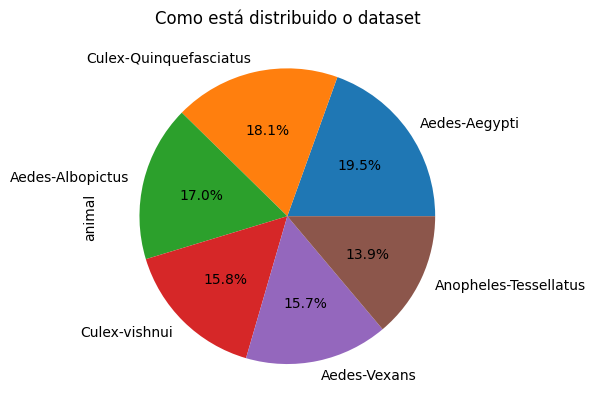

In [11]:
#Visualizando como está dividido o conjunto de dados por classe
df['animal'].value_counts().plot.pie(title='Como está distribuido o dataset', autopct='%1.1f%%')

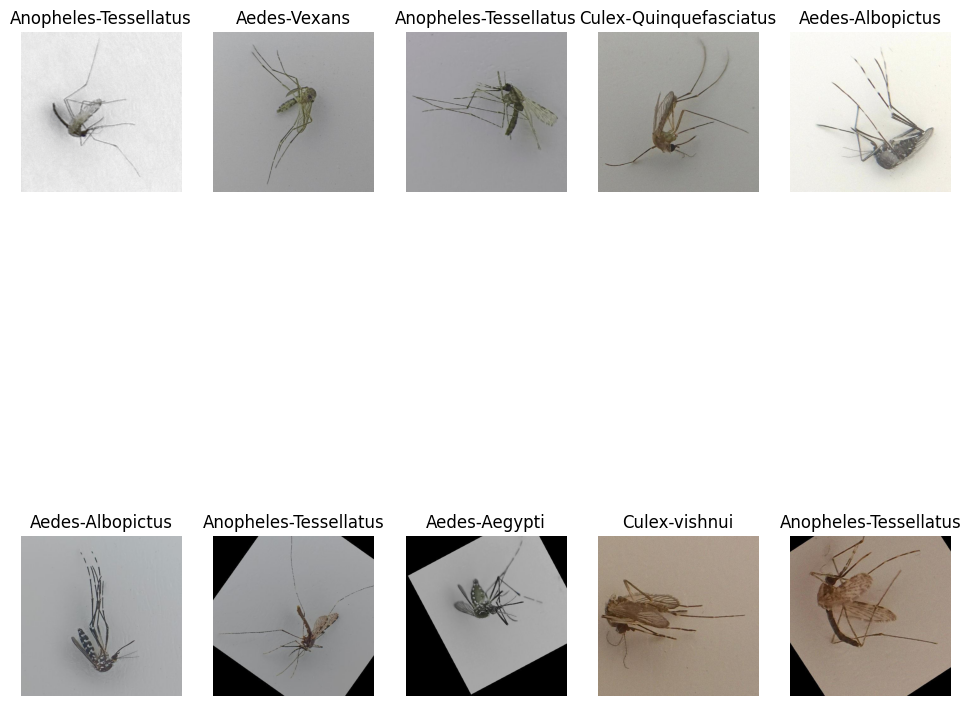

In [12]:

#visualizando algumas imagens do conjunto de dados
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)
for i, row in df.sample(n=10).reset_index().iterrows():
    plt.subplot(2,5,i+1)
    image_path = row['images']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["animal"])
    plt.axis('off')
plt.show()

###**3. Separação do dados de Treino e Teste**

In [13]:

df_train, df_tem = train_test_split(df[['images', 'animal']].reset_index(drop=True), test_size=0.3, random_state=30, shuffle=True)
df_test, df_val = train_test_split(df_tem, test_size=0.6, random_state=30, shuffle=True)

In [14]:
#Resumo da separação do conjunto de dados
print("#########Train##############")
print(df_train.head())
print(df_train.shape)
print("#########Test###############")
print(df_test.head())
print(df_test.shape)
print("#########Validação###############")
print(df_val.head())
print(df_val.shape)

#########Train##############
                                                  images  \
33659  /content/Mosquitos/Ae-vexans/Vivo-V21_Ae-vexan...   
4291   /content/Mosquitos/Ae-albopictus/Galaxy-A52s_A...   
49926  /content/Mosquitos/Cx-vishnui/Vivo-V21_Cx-vish...   
46960  /content/Mosquitos/Cx-vishnui/Vivo-V21_Cx-vish...   
9687   /content/Mosquitos/Cx-quinquefasciatus/Vivo-V2...   

                       animal  
33659            Aedes-Vexans  
4291         Aedes-Albopictus  
49926           Culex-vishnui  
46960           Culex-vishnui  
9687   Culex-Quinquefasciatus  
(36405, 2)
#########Test###############
                                                  images            animal
29471  /content/Mosquitos/Ae-vexans/Vivo-V21_Ae-vexan...      Aedes-Vexans
8030   /content/Mosquitos/Ae-albopictus/Vivo-V21_Ae-a...  Aedes-Albopictus
5968   /content/Mosquitos/Ae-albopictus/Vivo-Y21_Ae-a...  Aedes-Albopictus
31782  /content/Mosquitos/Ae-vexans/Vivo-Y21_Ae-vexan...      Aedes-Vexans
350

####**3.1. Preparação dos dados**

Através da classe **ImageDataGenerator** do TensorFlow iremos configurar geradores de dados para o treinamento, validação, e teste

In [15]:
%%time

BATCH_SIZE = 20 #Defino o tamanho do lote
IMAGE_SIZE = (150, 150) #Defino o tamanho das imagens

train_datagen=ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=df_train,
    target_size= IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    x_col='images',
    y_col='animal',
    color_mode ='rgb',
    seed = 20,
    shuffle=False
    )

val_generator=val_datagen.flow_from_dataframe(
    dataframe=df_val,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    x_col='images',
    y_col='animal',
    color_mode ='rgb',
    shuffle=False
    )

test_generator=test_datagen.flow_from_dataframe(
    dataframe = df_test,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    x_col='images',
    y_col='animal',
    color_mode ='rgb',
    shuffle=False)

Found 36405 validated image filenames belonging to 6 classes.
Found 9362 validated image filenames belonging to 6 classes.
Found 6241 validated image filenames belonging to 6 classes.
CPU times: user 361 ms, sys: 197 ms, total: 558 ms
Wall time: 585 ms


Found 1 validated image filenames belonging to 1 classes.


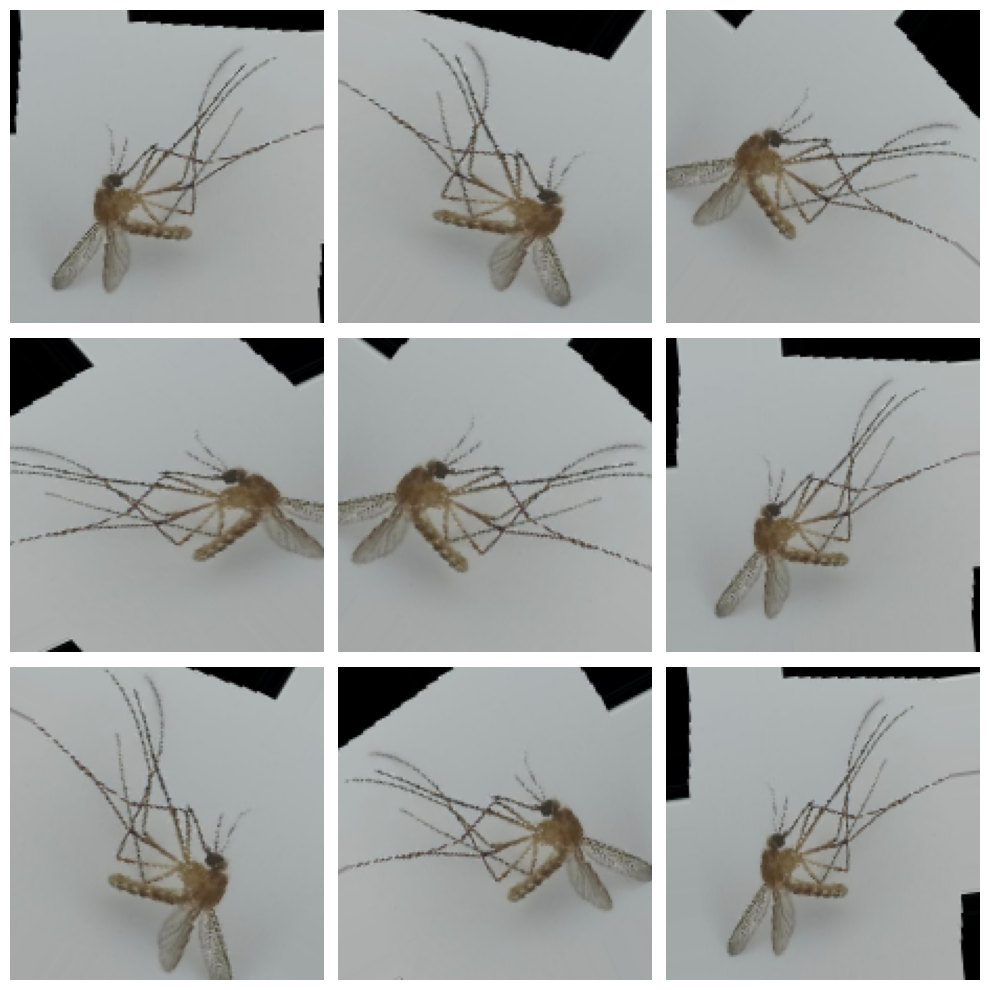

In [16]:
#Visualizo uma imagem com o class_mode="categorical"
sample = df.sample(n=1)

sample_generator = train_datagen.flow_from_dataframe(
    dataframe = sample,
    x_col='images',
    y_col='animal',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    color_mode ='rgb',
)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

###**4. Configuração de um modelo de deep learning**

In [21]:
model=models.Sequential()
model.add(layers.Conv2D(32 ,(3,3) , activation='relu' , input_shape=(150,150,3 ) ) )
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(64 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

In [22]:
model.add(layers.Flatten() )
model.add(layers.Dropout(0.25))
model.add(layers.Dense( 512 ,activation='relu' ))
model.add(layers.Dropout(0.25))
model.add(layers.Dense( 1 , activation='sigmoid' ) )

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

###**5. Treinamento do um modelo de deep learning**

As configurações do treinamento são:
optimizer='adam'

loss='binary_crossentropy'

metrics=['accuracy']:

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [25]:
history=model.fit_generator(train_generator ,
                            steps_per_epoch=50,
                            epochs=5 ,
                            validation_data=val_generator ,
                            validation_steps=50)

<ipython-input-25-55604360af2c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator ,


Epoch 1/5
50/50 [==============================] - 88s 2s/step - loss: 0.4766 - accuracy: 0.8207 - val_loss: 0.4527 - val_accuracy: 0.8333
Epoch 2/5
50/50 [==============================] - 85s 2s/step - loss: 0.4527 - accuracy: 0.8333 - val_loss: 0.4514 - val_accuracy: 0.8333
Epoch 3/5
50/50 [==============================] - 83s 2s/step - loss: 0.4515 - accuracy: 0.8333 - val_loss: 0.4512 - val_accuracy: 0.8333
Epoch 4/5
50/50 [==============================] - 111s 2s/step - loss: 0.4513 - accuracy: 0.8333 - val_loss: 0.4507 - val_accuracy: 0.8333
Epoch 5/5
50/50 [==============================] - 96s 2s/step - loss: 0.4512 - accuracy: 0.8333 - val_loss: 0.4506 - val_accuracy: 0.8333


####**5.1. Desempenho do modelo**

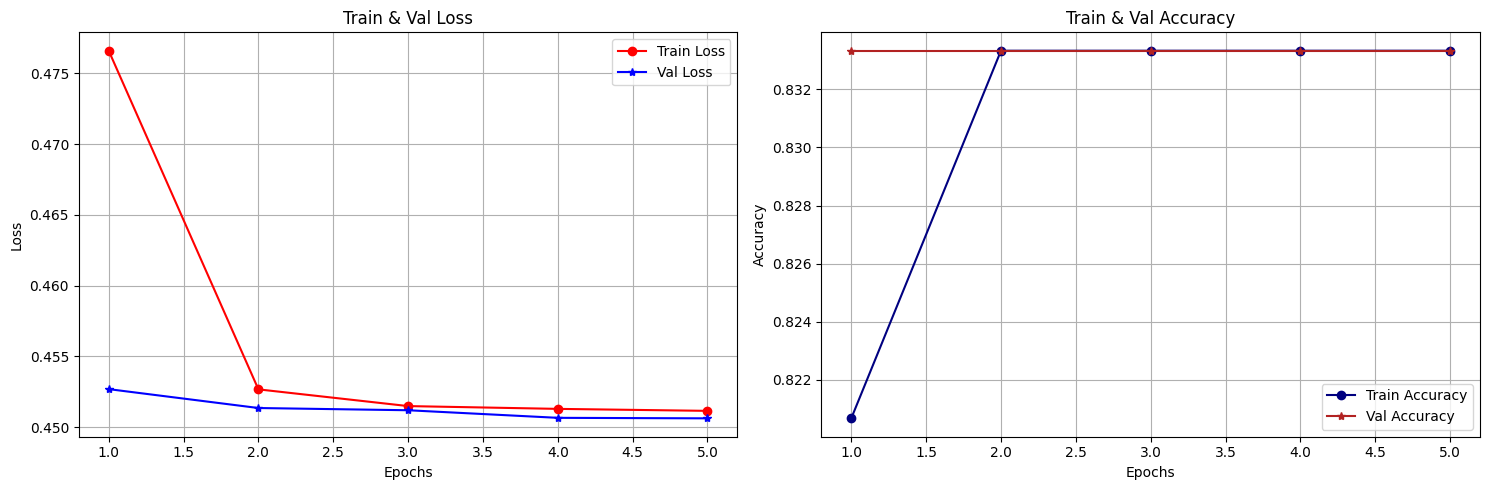

In [26]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

epochs = range(1, len(history.history['accuracy']) + 1)
loss_vals = history.history['loss']
val_loss_vals = history.history['val_loss']
acc_vals = history.history['accuracy']
val_acc_vals = history.history['val_accuracy']

ax[0].plot(epochs, loss_vals, color='red', marker='o', linestyle='-', label='Train Loss')
ax[0].plot(epochs, val_loss_vals, color='blue', marker='*', linestyle='-', label='Val Loss')
ax[0].set(title='Train & Val Loss', xlabel='Epochs', ylabel='Loss')
ax[0].legend(loc='best')
ax[0].grid(True)

ax[1].plot(epochs, acc_vals, color='navy', marker='o', linestyle='-', label='Train Accuracy')
ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', linestyle='-', label='Val Accuracy')
ax[1].set(title='Train & Val Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax[1].legend(loc='best')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [27]:
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

classes = dict(zip(test_generator.class_indices.values(), test_generator.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index": list(range(len(test_generator.labels))),
                            "Test Labels": test_generator.labels,
                            "Test Classes": [classes[i] for i in test_generator.labels],
                            "Prediction Labels": y_pred,
                            "Prediction Classes": [classes[i] for i in y_pred],
                            "Path": test_generator.filepaths,
                            "Prediction Probability": [x for x in np.asarray(np.max(model.predict(test_generator), axis=1))]
                           })
Predictions.head(10)

313/313 [==============================] - 116s 371ms/step


Image Index  Test Labels            Test Classes  Prediction Labels  \
0            0            2            Aedes-Vexans                  0   
1            1            1        Aedes-Albopictus                  0   
2            2            1        Aedes-Albopictus                  0   
3            3            2            Aedes-Vexans                  0   
4            4            2            Aedes-Vexans                  0   
5            5            3   Anopheles-Tessellatus                  0   
6            6            2            Aedes-Vexans                  0   
7            7            3   Anopheles-Tessellatus                  0   
8            8            4  Culex-Quinquefasciatus                  0   
9            9            3   Anopheles-Tessellatus                  0   

  Prediction Classes                                               Path  \
0      Aedes-Aegypti  /content/Mosquitos/Ae-vexans/Vivo-V21_Ae-vexan...   
1      Aedes-Aegypti  /content/Mosquitos/Ae-albopictus/Vivo-V21_Ae-a...   
2      Aedes-Aegypti  /content/Mosquitos/Ae-albopictus/Vivo-Y21_Ae-a...   
3      Aedes-Aegypti  /content/Mosquitos/Ae-vexans/Vivo-Y21_Ae-vexan...   
4      Aedes-Aegypti  /content/Mosquitos/Ae-vexans/Vivo-V21_Ae-vexan...   
5      Aedes-Aegypti  /content/Mosquitos/An-tessellatus/Vivo-V21_An-...   
6      Aedes-Aegypti  /content/Mosquitos/Ae-vexans/Vivo-V21_Ae-vexan...   
7      Aedes-Aegypti  /content/Mosquitos/An-tessellatus/Vivo-V21_An-...   
8      Aedes-Aegypti  /content/Mosquitos/Cx-quinquefasciatus/Vivo-Y2...   
9      Aedes-Aegypti  /content/Mosquitos/An-tessellatus/Galaxy-A52s_...   

   Prediction Probability  
0                0.163749  
1                0.159222  
2                0.163343  
3                0.168217  
4                0.164900  
5                0.170582  
6                0.170031  
7                0.170728  
8                0.164207  
9                0.167803

###**6. Execução do modelo treinado em um subconjunto das imagems de teste**

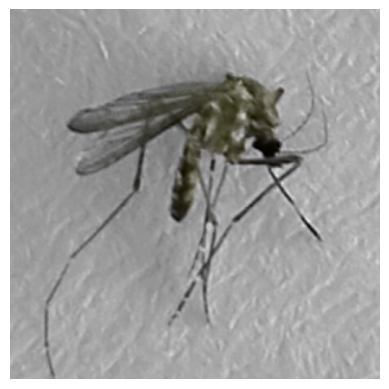

True Label:  Culex-vishnui
Predicted Label:  Aedes-Aegypti
Probability:  0.16



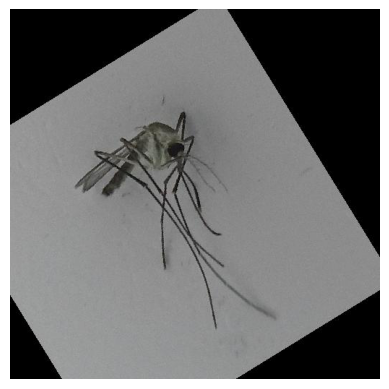

True Label:  Culex-Quinquefasciatus
Predicted Label:  Aedes-Aegypti
Probability:  0.17



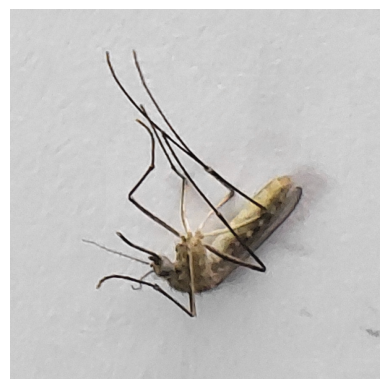

True Label:  Culex-Quinquefasciatus
Predicted Label:  Aedes-Aegypti
Probability:  0.15



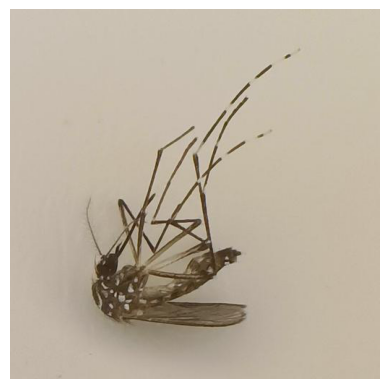

True Label:  Aedes-Aegypti
Predicted Label:  Aedes-Aegypti
Probability:  0.16



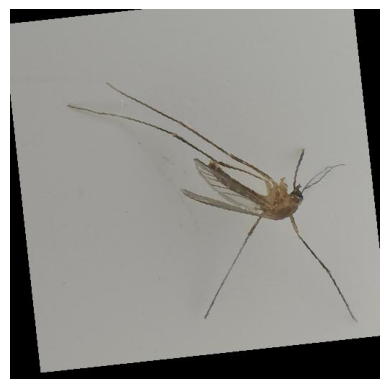

True Label:  Culex-Quinquefasciatus
Predicted Label:  Aedes-Aegypti
Probability:  0.17



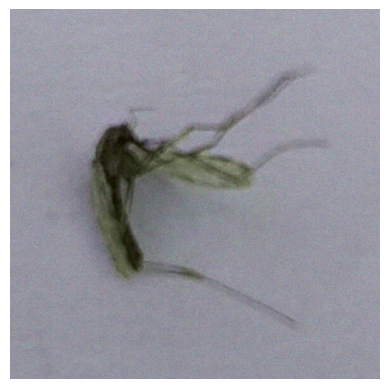

True Label:  Anopheles-Tessellatus
Predicted Label:  Aedes-Aegypti
Probability:  0.17



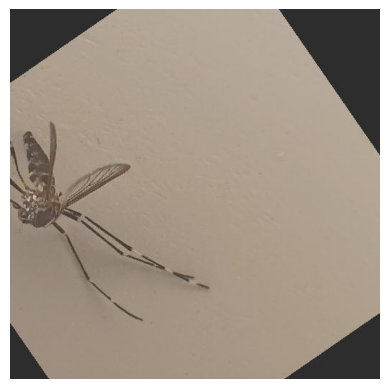

True Label:  Aedes-Albopictus
Predicted Label:  Aedes-Aegypti
Probability:  0.17



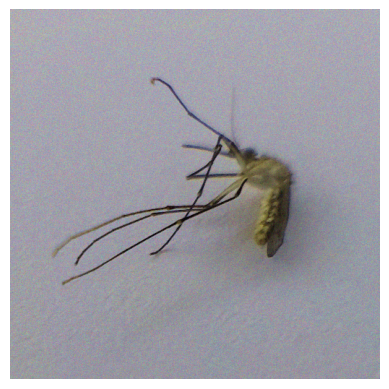

True Label:  Culex-Quinquefasciatus
Predicted Label:  Aedes-Aegypti
Probability:  0.16



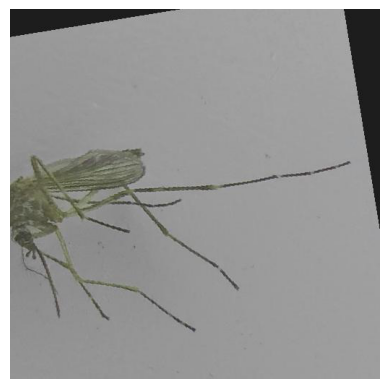

True Label:  Aedes-Vexans
Predicted Label:  Aedes-Aegypti
Probability:  0.17



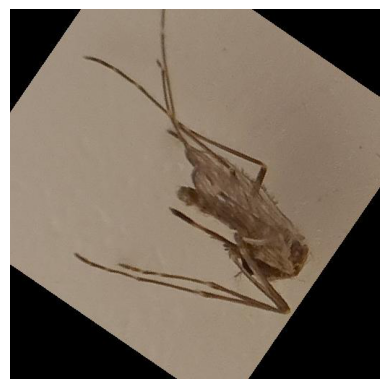

True Label:  Culex-vishnui
Predicted Label:  Aedes-Aegypti
Probability:  0.16



In [28]:
sample_predictions = Predictions.sample(n=10)

for index, row in sample_predictions.iterrows():
    # Obtendo as informações necessárias para visualização e impressão
    image = plt.imread(row['Path'])
    true_label = row['Test Classes']
    predicted_label = row['Prediction Classes']
    probability = row['Prediction Probability']

    # Arredondando a probabilidade para duas casas decimais
    probability = round(probability, 2)

    # Configuração da figura para exibir a imagem
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Impressão dos resultados da classificação
    print("True Label: ", true_label)
    print("Predicted Label: ", predicted_label)
    print("Probability: ", probability)
    print()

###**7. Avaliação do modelo**

In [29]:
results = model.evaluate(test_generator, verbose=0)

print("    Test Loss: {:.2f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.45
Test Accuracy: 83.33%


In [30]:
accuracy = skm.accuracy_score(y_true, y_pred)
precision = skm.precision_score(y_true, y_pred, average='weighted')
recall = skm.recall_score(y_true, y_pred, average='weighted')
f1score = skm.f1_score(y_true, y_pred, average='weighted')

# Arredondar os valores para duas casas decimais
accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1score = round(f1score, 2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Accuracy: 0.19
Precision: 0.04
Recall: 0.19
F1 Score: 0.06
                        precision    recall  f1-score   support

         Aedes-Aegypti       0.19      1.00      0.33      1212
      Aedes-Albopictus       0.00      0.00      0.00      1052
          Aedes-Vexans       0.00      0.00      0.00       928
 Anopheles-Tessellatus       0.00      0.00      0.00       889
Culex-Quinquefasciatus       0.00      0.00      0.00      1162
         Culex-vishnui       0.00      0.00      0.00       998

              accuracy                           0.19      6241
             macro avg       0.03      0.17      0.05      6241
          weighted avg       0.04      0.19      0.06      6241



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Matriz de confusão sem normalização


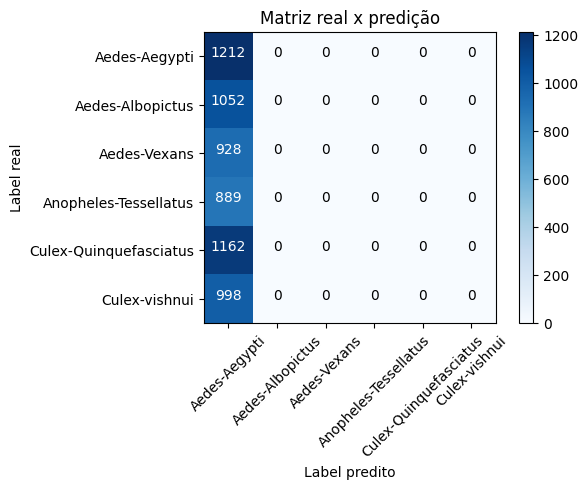

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt_str = '{:d}' if not normalize else '{:.2f}'

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt_str.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

class_names = list(test_generator.class_indices.values())
y_pred = Predictions['Prediction Labels']
y_test = Predictions['Test Labels']
Map_class = test_generator.class_indices

cnf_matrix = confusion_matrix(y_true, y_pred, labels=class_names)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=Map_class,
                      normalize=False,
                      title='Matriz real x predição')

###**8.  Exportação do modelo para posterior uso**

In [33]:
# obtendo a data e hora atual
now = datetime.now()

# Definição do formato
format = '%Y-%m-%dT%H%M'

# Converter a data e hora em uma string com o formato especificado
formatted_datetime = now.strftime(format)

path_model = '/content/'

name_model = 'trained_model_mosquito' + formatted_datetime + '.h5'

# salvando o modelo
model.save("%s/%s" % (path_model, name_model))
print("Modelo salvo com o nome: ", name_model)


Modelo salvo com o nome:  trained_model_mosquito2023-07-24T0210.h5


###**8.  Teste do modelo**

In [34]:
loaded_model = keras.models.load_model("%s/%s" % (path_model, name_model))
print("Modelo %s carregado com sucesso" % (name_model))

Modelo trained_model_mosquito2023-07-24T0210.h5 carregado com sucesso


In [35]:
y_true = test_generator.classes
y_pred = np.argmax(loaded_model.predict(test_generator), axis = 1)

classes = dict(zip(test_generator.class_indices.values(), test_generator.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index": list(range(len(test_generator.labels))),
                            "Test Labels": test_generator.labels,
                            "Test Classes": [classes[i] for i in test_generator.labels],
                            "Prediction Labels": y_pred,
                            "Prediction Classes": [classes[i] for i in y_pred],
                            "Path": test_generator.filepaths,
                            "Prediction Probability": [x for x in np.asarray(np.max(loaded_model.predict(test_generator), axis=1))]
                           })
Predictions.head(10)


313/313 [==============================] - 129s 410ms/step


Image Index  Test Labels            Test Classes  Prediction Labels  \
0            0            2            Aedes-Vexans                  0   
1            1            1        Aedes-Albopictus                  0   
2            2            1        Aedes-Albopictus                  0   
3            3            2            Aedes-Vexans                  0   
4            4            2            Aedes-Vexans                  0   
5            5            3   Anopheles-Tessellatus                  0   
6            6            2            Aedes-Vexans                  0   
7            7            3   Anopheles-Tessellatus                  0   
8            8            4  Culex-Quinquefasciatus                  0   
9            9            3   Anopheles-Tessellatus                  0   

  Prediction Classes                                               Path  \
0      Aedes-Aegypti  /content/Mosquitos/Ae-vexans/Vivo-V21_Ae-vexan...   
1      Aedes-Aegypti  /content/Mosquitos/Ae-albopictus/Vivo-V21_Ae-a...   
2      Aedes-Aegypti  /content/Mosquitos/Ae-albopictus/Vivo-Y21_Ae-a...   
3      Aedes-Aegypti  /content/Mosquitos/Ae-vexans/Vivo-Y21_Ae-vexan...   
4      Aedes-Aegypti  /content/Mosquitos/Ae-vexans/Vivo-V21_Ae-vexan...   
5      Aedes-Aegypti  /content/Mosquitos/An-tessellatus/Vivo-V21_An-...   
6      Aedes-Aegypti  /content/Mosquitos/Ae-vexans/Vivo-V21_Ae-vexan...   
7      Aedes-Aegypti  /content/Mosquitos/An-tessellatus/Vivo-V21_An-...   
8      Aedes-Aegypti  /content/Mosquitos/Cx-quinquefasciatus/Vivo-Y2...   
9      Aedes-Aegypti  /content/Mosquitos/An-tessellatus/Galaxy-A52s_...   

   Prediction Probability  
0                0.163749  
1                0.159222  
2                0.163343  
3                0.168217  
4                0.164900  
5                0.170582  
6                0.170031  
7                0.170728  
8                0.164207  
9                0.167803

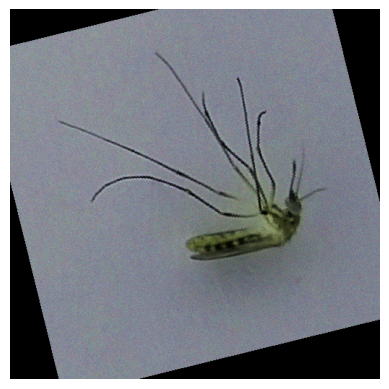

True Label:  Culex-Quinquefasciatus
Predicted Label:  Aedes-Aegypti
Probability:  0.16



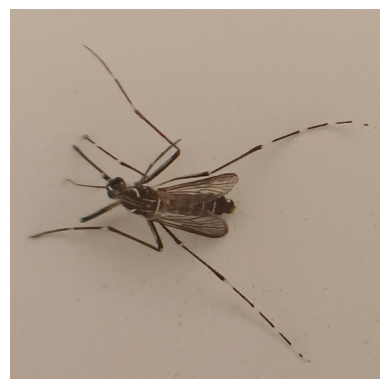

True Label:  Aedes-Aegypti
Predicted Label:  Aedes-Aegypti
Probability:  0.16



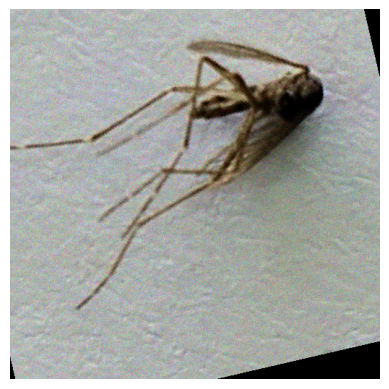

True Label:  Aedes-Vexans
Predicted Label:  Aedes-Aegypti
Probability:  0.16



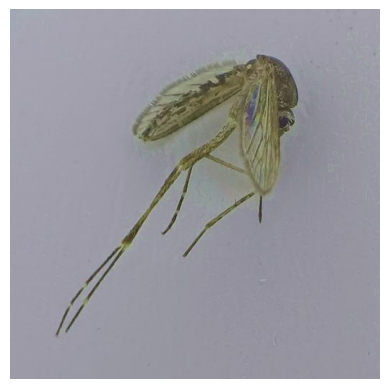

True Label:  Aedes-Vexans
Predicted Label:  Aedes-Aegypti
Probability:  0.17



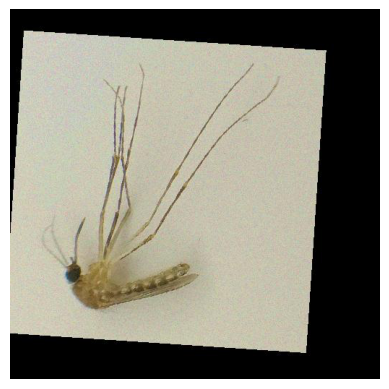

True Label:  Culex-Quinquefasciatus
Predicted Label:  Aedes-Aegypti
Probability:  0.16



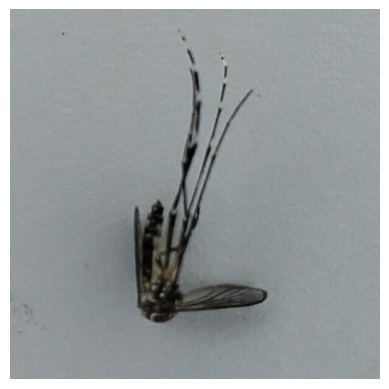

True Label:  Aedes-Aegypti
Predicted Label:  Aedes-Aegypti
Probability:  0.17



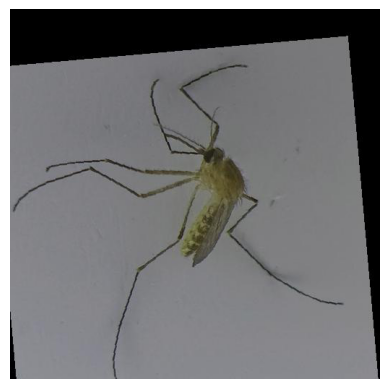

True Label:  Culex-Quinquefasciatus
Predicted Label:  Aedes-Aegypti
Probability:  0.16



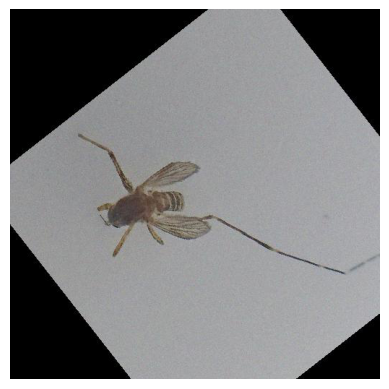

True Label:  Aedes-Vexans
Predicted Label:  Aedes-Aegypti
Probability:  0.17



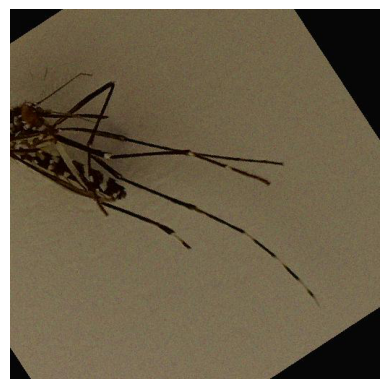

True Label:  Aedes-Albopictus
Predicted Label:  Aedes-Aegypti
Probability:  0.16



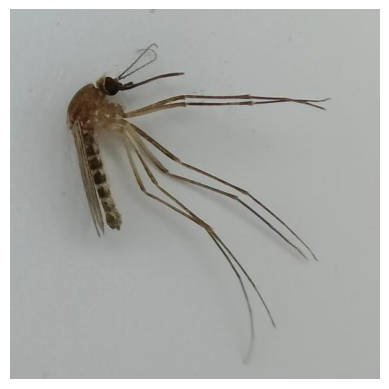

True Label:  Culex-Quinquefasciatus
Predicted Label:  Aedes-Aegypti
Probability:  0.16



In [36]:
sample_predictions = Predictions.sample(n=10)

for index, row in sample_predictions.iterrows():
    # Informações necessárias para visualização e impressão
    image = plt.imread(row['Path'])
    true_label = row['Test Classes']
    predicted_label = row['Prediction Classes']
    probability = row['Prediction Probability']

    probability = round(probability, 2)

    # Configuração da figura para exibir a imagem
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Impressão dos resultados da classificação
    print("True Label: ", true_label)
    print("Predicted Label: ", predicted_label)
    print("Probability: ", probability)
    print()